In [21]:
# !pip install graphviz pydotplus

In [22]:
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbbors
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [23]:
import pandas as pd #
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler

In [24]:
df_train=pd.read_csv("StudentsPerformance.csv")

In [25]:
df_train.head()

Student_id  gender parental level of education test preparation course  \
0           1  female           bachelor's degree                    none   
1           2  female                some college               completed   
2           3  female             master's degree                    none   
3           4    male          associate's degree      Partialy completed   
4           5    male                some college                    none   

   Software Engineering score  Machine Learningscore  DBMS score  \
0                          72                     72          74   
1                          69                     90          88   
2                          90                     95          93   
3                          47                     57          44   
4                          76                     78          75   

   Elective 1 score  Elective 2 score  Attendance  Study hours/Day  \
0                88                69          86                3   
1                76                63          86                1   
2                95                56          86                2   
3                94                40          85                2   
4                77                97          86                2   

   Assignment marks  Time spent on social media in mins  \
0                15                                  90   
1                15                                  90   
2                15                                  90   
3                15                                  90   
4                15                                  90   

  Participation in extra cirricular activities  Current Sem percentage  \
0                                           no                    75.0   
1                                          yes                    77.2   
2                                           no                    85.8   
3                                          yes                    56.4   
4                                           no                    80.6   

  Pass/Fail  Previous sem percentage  
0      Pass                       83  
1      Pass                       94  
2      Pass                       70  
3      Pass                       70  
4      Pass                       67

In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Student_id                                    999 non-null    int64  
 1   gender                                        999 non-null    object 
 2   parental level of education                   999 non-null    object 
 3   test preparation course                       999 non-null    object 
 4   Software Engineering score                    999 non-null    int64  
 5   Machine Learningscore                         999 non-null    int64  
 6   DBMS score                                    999 non-null    int64  
 7   Elective 1 score                              999 non-null    int64  
 8   Elective 2 score                              999 non-null    int64  
 9   Attendance                                    999 non-null    int

In [27]:
df_train.columns

Index(['Student_id', 'gender', 'parental level of education',
       'test preparation course', 'Software Engineering score',
       'Machine Learningscore', 'DBMS score', 'Elective 1 score',
       'Elective 2 score', 'Attendance', 'Study hours/Day', 'Assignment marks',
       'Time spent on social media in mins',
       'Participation in extra cirricular activities',
       'Current Sem percentage', 'Pass/Fail', 'Previous sem percentage'],
      dtype='object')

In [28]:
def getLabelCount(df,target):
    return sorted([( labelValue,len(df.loc[df[target] == labelValue]) ) for labelValue in df[target].unique()])
TARGET = "Pass/Fail"
labelCount = getLabelCount(df_train,TARGET)
labelCount

[('Fail', 24), ('Pass', 975)]

<AxesSubplot:>

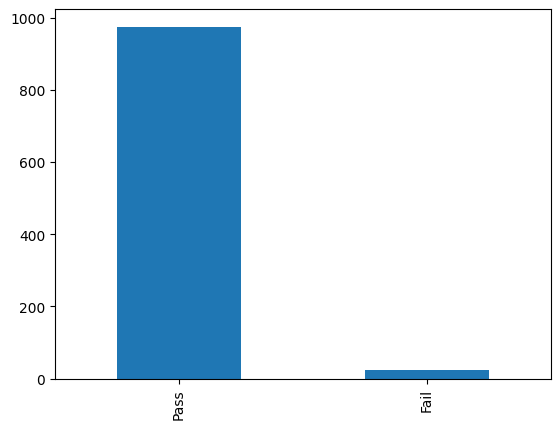

In [29]:
df_train['Pass/Fail'].value_counts().plot(kind='bar')

In [30]:
def dynamic_label_encode(df):
    encoded_df = df.copy()
    label_encoders = {}

    for column in df.select_dtypes(include=['object']).columns:
        le = preprocessing.LabelEncoder()
        encoded_df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

    return encoded_df, label_encoders

encoded_df, label_encoders = dynamic_label_encode(df_train)

In [31]:
label_encoders

{'gender': LabelEncoder(),
 'parental level of education': LabelEncoder(),
 'test preparation course': LabelEncoder(),
 'Participation in extra cirricular activities': LabelEncoder(),
 'Pass/Fail': LabelEncoder()}

In [32]:
b=encoded_df
b.to_csv("preprocess.csv")
encoded_df

Student_id  gender  parental level of education  test preparation course  \
0             1       0                            1                        2   
1             2       0                            4                        1   
2             3       0                            3                        2   
3             4       1                            0                        0   
4             5       1                            4                        2   
..          ...     ...                          ...                      ...   
994         995       1                            4                        2   
995         996       1                            0                        0   
996         997       1                            4                        2   
997         998       0                            1                        2   
998         999       1                            0                        0   

     Software Engineering score  Machine Learningscore  DBMS score  \
0                            72                     72          74   
1                            69                     90          88   
2                            90                     95          93   
3                            47                     57          44   
4                            76                     78          75   
..                          ...                    ...         ...   
994                          81                     74          81   
995                          90                     85          89   
996                          65                     89          87   
997                          75                    100          71   
998                          70                     82          44   

     Elective 1 score  Elective 2 score  Attendance  Study hours/Day  \
0                  88                69          86                3   
1                  76                63          86                1   
2                  95                56          86                2   
3                  94                40          85                2   
4                  77                97          86                2   
..                ...               ...         ...              ...   
994                89                65          47                3   
995                69                40          75                1   
996                63                57          80                4   
997                76                69          52                4   
998                75                56          58                2   

     Assignment marks  Time spent on social media in mins  \
0                  15                                  90   
1                  15                                  90   
2                  15                                  90   
3                  15                                  90   
4                  15                                  90   
..                ...                                 ...   
994                18                                 100   
995                12                                 100   
996                11                                 100   
997                13                                 100   
998                20                                 100   

     Participation in extra cirricular activities  Current Sem percentage  \
0                                               0                    75.0   
1                                               2                    77.2   
2                                               0                    85.8   
3                                               2                    56.4   
4                                               0                    80.6   
..                                            ...                     ...   
994                                             1     

In [33]:
df_numerics_only = df_train.select_dtypes(include=np.number)

In [34]:
to_scale = [col for col in encoded_df.columns if encoded_df[col].max()>1]
scaler = RobustScaler()
scaled =scaler.fit_transform(encoded_df[to_scale])
scaled = pd.DataFrame(scaled, columns=to_scale)

# replace original columns with scaled columns
for col in scaled:
    encoded_df[col] = scaled[col]

In [35]:
to_scale

['Student_id',
 'parental level of education',
 'test preparation course',
 'Software Engineering score',
 'Machine Learningscore',
 'DBMS score',
 'Elective 1 score',
 'Elective 2 score',
 'Attendance',
 'Study hours/Day',
 'Assignment marks',
 'Time spent on social media in mins',
 'Participation in extra cirricular activities',
 'Current Sem percentage',
 'Previous sem percentage']

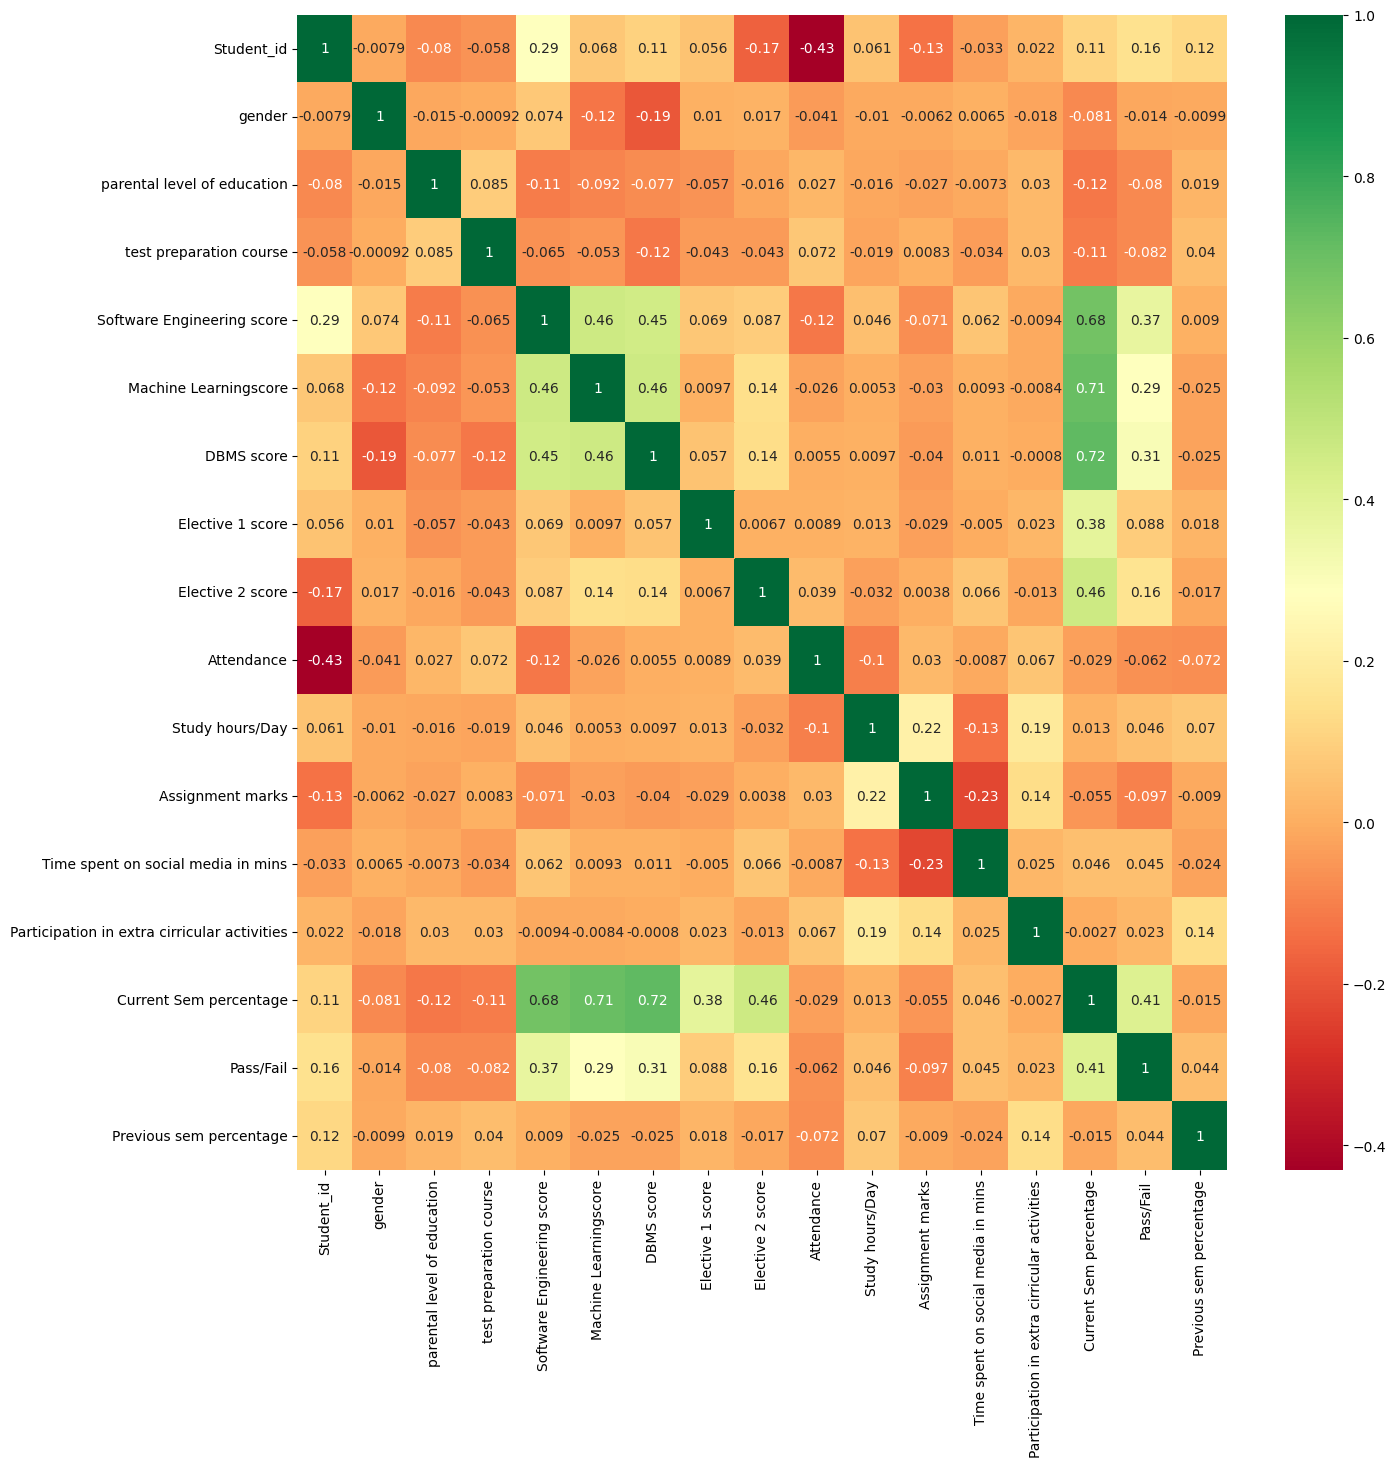

In [36]:
corrmat = encoded_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))

#plot heat map
g=sns.heatmap(encoded_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [37]:
X=encoded_df.drop(["Pass/Fail",'Current Sem percentage','Student_id'], axis=1)
Y=encoded_df["Pass/Fail"]
print(X.shape)
print(Y.shape)

(999, 14)
(999,)


In [38]:
# sklearn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size = 0.25)

In [39]:
print(X_train.shape)
print(X_test.shape)

(749, 14)
(250, 14)


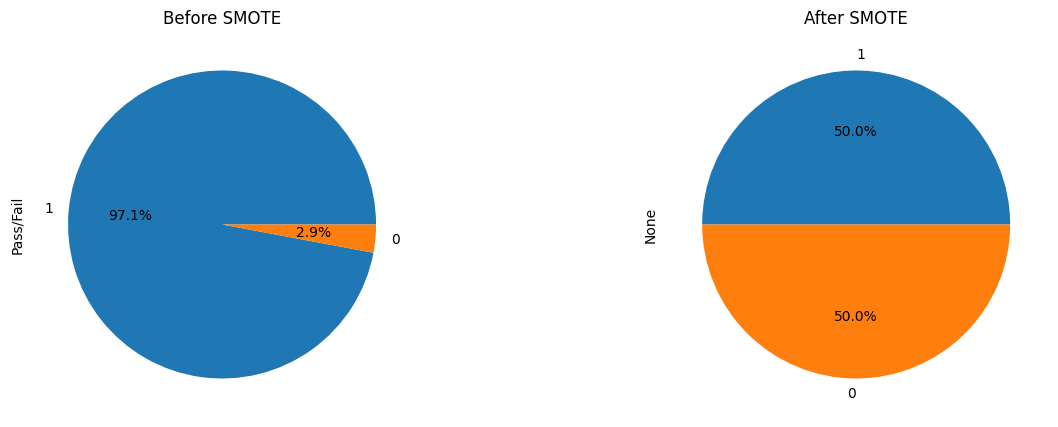

In [40]:
# from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_new, y_train_new = smote.fit_resample(X_train, y_train.values.ravel())
import matplotlib.ticker as mtick

# to demonstrate the effect of SMOTE over imbalanced datasets
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(15, 5))
ax1.set_title('Before SMOTE')
pd.Series(y_train).value_counts().plot.pie(autopct='%.1f%%',ax=ax1)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.set_title('After SMOTE')  
pd.Series(y_train_new).value_counts().plot.pie(autopct='%.1f%%',ax=ax2)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

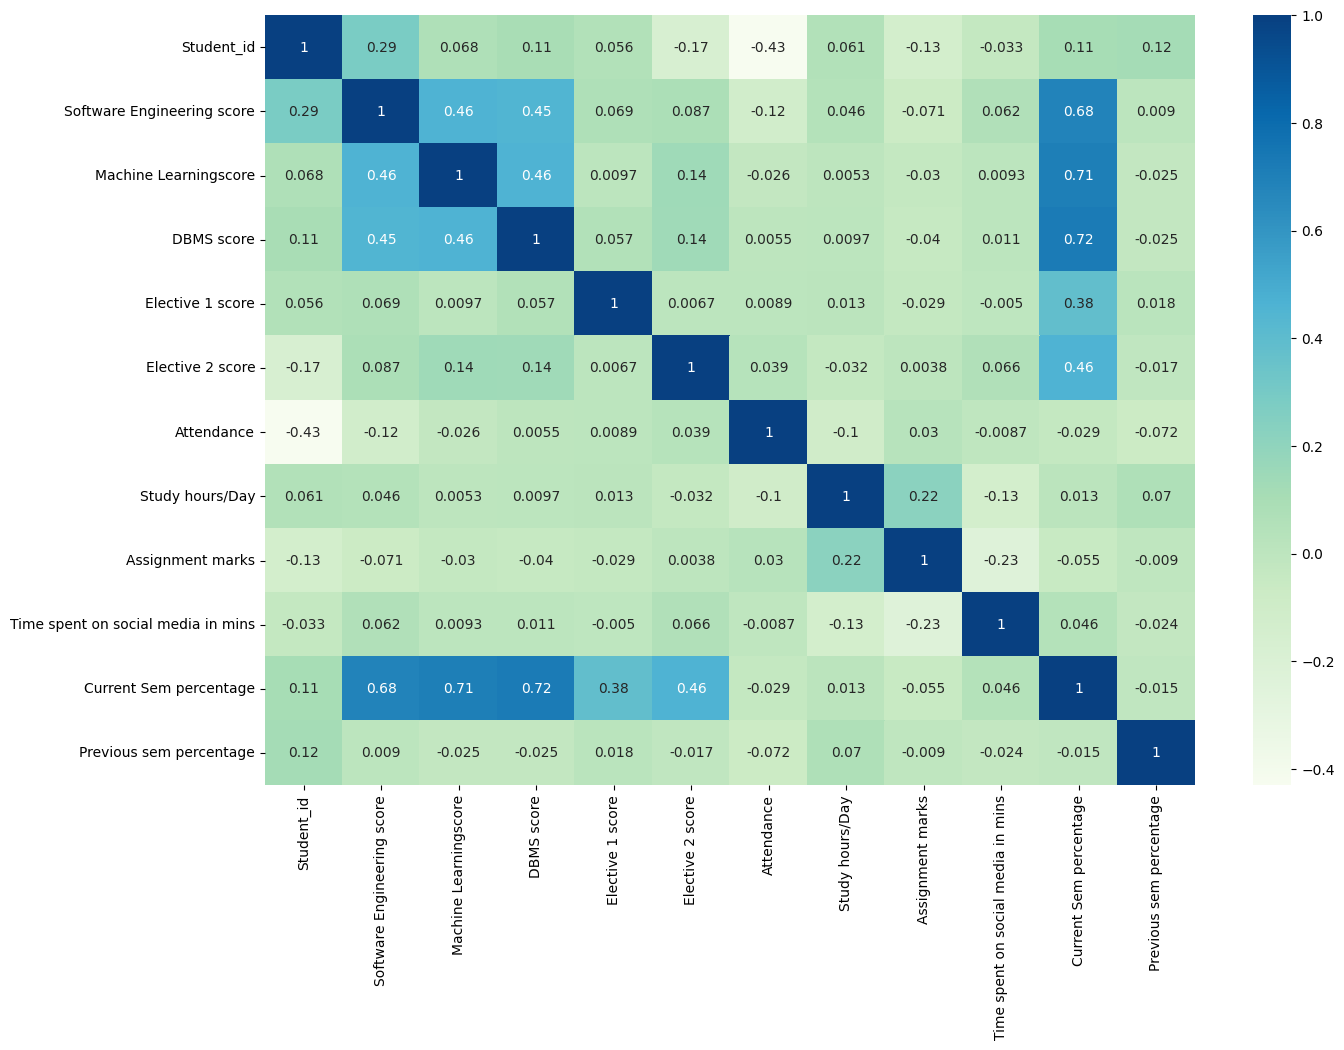

In [41]:
plt.figure(figsize= (15, 10))
sns.heatmap(df_numerics_only.corr(), annot=True, cmap= 'GnBu')
plt.show()

In [42]:
lr =  LogisticRegression()
lr.fit(X_train_new, y_train_new)
y_pred=lr.predict(X_test)

In [43]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy Logistic Regression:",metrics.accuracy_score(y_test, y_pred))

Accuracy Logistic Regression: 0.984


In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = y_test
# predicted values
predicted =y_pred

# confusion matrix
matrixresult = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrixresult)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report Logistic Regression : \n',matrix)

Confusion matrix : 
 [[244   4]
 [  0   2]]
Outcome values : 
 244 4 0 2
Classification report Logistic Regression : 
               precision    recall  f1-score   support

           1       1.00      0.98      0.99       248
           0       0.33      1.00      0.50         2

    accuracy                           0.98       250
   macro avg       0.67      0.99      0.75       250
weighted avg       0.99      0.98      0.99       250



In [45]:
import joblib
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("LogisticRegression:",metrics.accuracy_score(y_test, y_pred))

# Save the trained model to a file using joblib
# model_filename1 = "models/Logistic_Regression_Classify_model.joblib"
# joblib.dump(lr, model_filename1)
# print(f"Model saved as {model_filename1}")

LogisticRegression: 0.984


In [46]:
X_test.shape

(250, 14)

In [47]:
X_train_new

gender  parental level of education  test preparation course  \
0          0                     0.250000                      0.0   
1          0                     0.000000                      0.0   
2          1                    -0.500000                      1.0   
3          0                     0.250000                      1.0   
4          0                    -0.250000                      0.0   
...      ...                          ...                      ...   
1449       0                     0.750000                      1.0   
1450       0                     0.181321                      1.0   
1451       0                     0.275516                      1.0   
1452       0                    -0.193274                      1.0   
1453       0                     0.750000                      1.0   

      Software Engineering score  Machine Learningscore  DBMS score  \
0                      -0.421053              -0.291667   -0.840000   
1                       0.368421               0.791667    0.640000   
2                      -0.052632               1.041667   -1.120000   
3                       0.421053              -1.041667   -0.600000   
4                       0.894737              -0.291667    0.000000   
...                          ...                    ...         ...   
1449                   -2.636311              -1.523981   -1.606043   
1450                   -1.694042              -0.878208   -1.170551   
1451                   -1.673467              -0.896263   -1.128165   
1452                   -1.907108              -1.081578   -0.880000   
1453                   -2.440145              -1.306781   -1.677582   

      Elective 1 score  Elective 2 score  Attendance  Study hours/Day  \
0            -0.634146         -0.047619   -1.833333         1.000000   
1             0.146341          0.285714   -0.388889        -0.500000   
2             1.512195         -0.666667   -1.055556        -0.500000   
3            -0.146341         -0.333333   -0.666667         0.000000   
4             0.292683         -1.000000   -0.500000        -0.500000   
...                ...               ...         ...              ...   
1449          0.044217         -0.083762    0.102718         0.000000   
1450         -0.346286         -0.726847   -0.086080        -0.500000   
1451         -0.057731         -0.650147    0.108849        -0.224484   
1452         -0.509942         -1.196881   -0.002793        -0.386549   
1453          0.384345          0.673980   -0.518608         0.000000   

      Assignment marks  Time spent on social media in mins  \
0            -0.200000                            0.250000   
1            -0.400000                            0.666667   
2             0.000000                           -0.333333   
3            -0.400000                           -0.333333   
4             0.000000                           -0.500000   
...                ...                                 ...   
1449          0.127339                            0.323140   
1450         -0.290114                            0.241761   
1451          0.000000                            0.275516   
1452          0.090761                           -0.132360   
1453          0.563725                           -0.282951   

      Participation in extra cirricular activities  Previous sem percentage  
0                                         1.000000                -2.142857  
1                                         0.000000                 0.000000  
2                                        -1.000000                 0.000000  
3                                         0.000000                 1.642857  
4                                         0.000000                 0.642857  
...                                            ...                      ...  
1449                                      1.000000                 0.075797  
1450                                      0.000000                

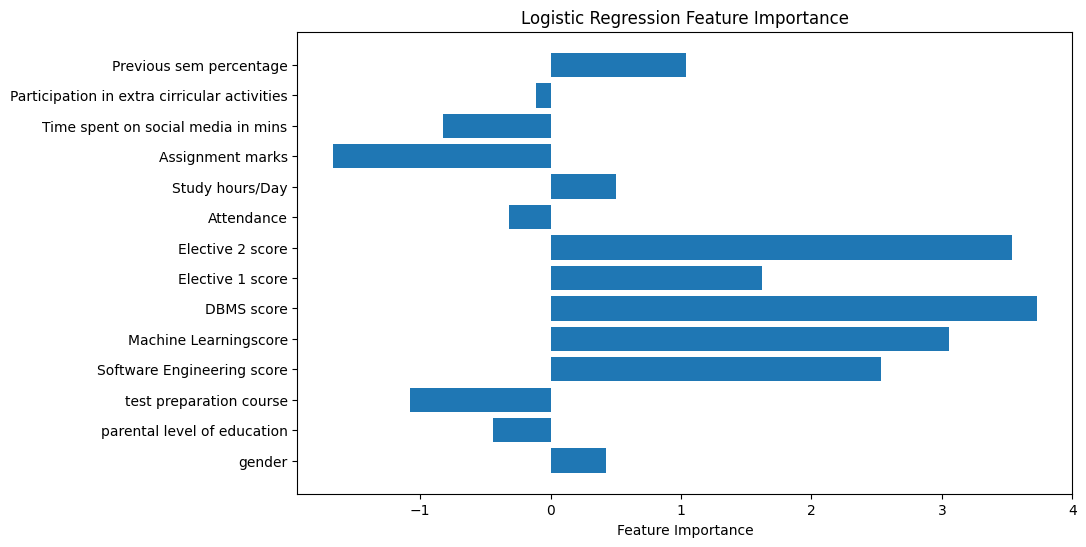

In [48]:
feature_importances = lr.coef_[0]

# Create a bar chart to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(X_train_new.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Logistic Regression Feature Importance')
plt.show()

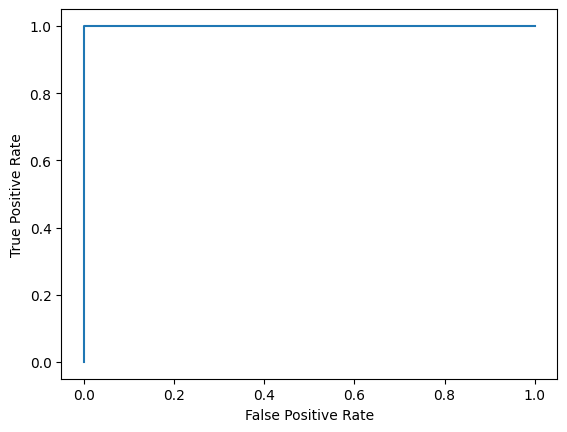

In [49]:
#define metrics
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [50]:
y_test

723    1
6      1
675    1
272    1
745    1
      ..
199    1
702    1
96     1
924    1
387    1
Name: Pass/Fail, Length: 250, dtype: int32

In [51]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=3)  
classifier.fit(X_train_new, y_train_new)  
y_pred4=classifier.predict(X_test)

In [52]:
# !pip install ipywidgets

In [53]:
from ipywidgets import interact, widgets

In [54]:
X_test

gender  parental level of education  test preparation course  \
723       1                        -0.50                      0.0   
6         0                         0.50                      0.0   
675       0                         0.75                      1.0   
272       0                        -0.50                      1.0   
745       0                        -0.25                      0.0   
..      ...                          ...                      ...   
199       0                        -0.25                      1.0   
702       1                        -0.50                      0.0   
96        1                         0.75                      0.0   
924       1                         0.00                      1.0   
387       0                        -0.50                      1.0   

     Software Engineering score  Machine Learningscore  DBMS score  \
723                   -0.526316              -0.625000       -0.04   
6                      0.947368               1.083333        0.92   
675                   -0.368421               0.041667       -0.20   
272                   -1.210526              -0.666667       -0.44   
745                   -0.421053              -0.916667        0.88   
..                          ...                    ...         ...   
199                    0.421053               0.416667        0.28   
702                    0.526316              -0.291667       -0.76   
96                    -0.263158              -0.125000       -0.28   
924                    0.842105               0.791667        0.48   
387                   -0.684211               0.375000       -0.08   

     Elective 1 score  Elective 2 score  Attendance  Study hours/Day  \
723          0.390244         -1.142857    0.555556              0.5   
6            0.292683          0.428571    0.333333              0.0   
675          0.292683         -0.238095   -0.722222              0.0   
272          0.439024         -0.333333    0.444444              0.0   
745          1.073171         -0.857143    0.388889              0.5   
..                ...               ...         ...              ...   
199         -0.292683          0.238095   -0.555556              0.0   
702          0.780488          0.238095   -1.722222              1.0   
96          -0.048780         -0.047619    0.222222              1.0   
924          0.341463          0.238095   -1.611111              1.0   
387          0.780488         -0.142857    0.833333              0.0   

     Assignment marks  Time spent on social media in mins  \
723               0.6                           -0.583333   
6                 0.0                            0.500000   
675               0.8                            1.500000   
272               0.2                            0.333333   
745               0.4                           -0.250000   
..                ...                                 ...   
199              -0.4                           -0.250000   
702              -0.6                            0.666667   
96                1.0                           -0.500000   
924               0.8                           -0.333333   
387              -0.2                           -0.333333   

     Participation in extra cirricular activities  Previous sem percentage  
723                                           1.0                -0.928571  
6                                             0.0                 0.357143  
675                                           1.0                 1.142857  
272                                           1.0                 0.000000  
745                                           1.0                 0.071429  
..                                            ...                      ...  
199                                          -1.0                -0.142857  
702                                           1.0                 0.928571  
96                                          

In [55]:
encoded_df.columns

Index(['Student_id', 'gender', 'parental level of education',
       'test preparation course', 'Software Engineering score',
       'Machine Learningscore', 'DBMS score', 'Elective 1 score',
       'Elective 2 score', 'Attendance', 'Study hours/Day', 'Assignment marks',
       'Time spent on social media in mins',
       'Participation in extra cirricular activities',
       'Current Sem percentage', 'Pass/Fail', 'Previous sem percentage'],
      dtype='object')

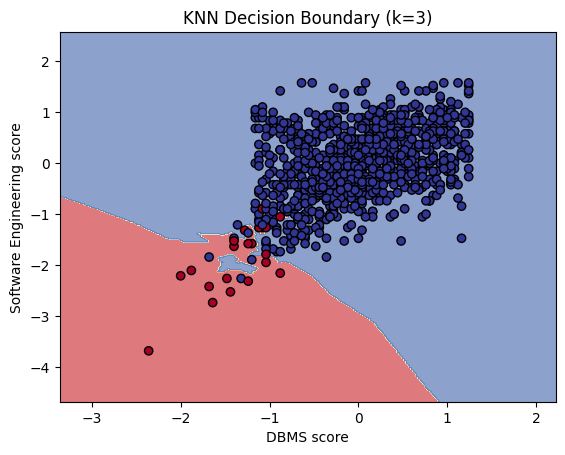

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

X=encoded_df[['DBMS score','Software Engineering score']].values
y=encoded_df['Pass/Fail'].values
# Create a KNN classifier
k = 3  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the classifier to the data
knn.fit(X, y)

# Define a mesh grid to create a decision boundary plot
h = 0.02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the class for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k')
plt.title(f'KNN Decision Boundary (k={k})')
plt.xlabel('DBMS score')
plt.ylabel('Software Engineering score')
plt.show()

In [57]:
from sklearn import metrics
print("Accuracy KNN:",metrics.accuracy_score(y_test, y_pred4))

Accuracy KNN: 0.968


In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = y_test
# predicted values
predicted =y_pred4

# confusion matrix
matrixresult = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrixresult)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification KNeighborsClassifier : \n',matrix)

Confusion matrix : 
 [[241   7]
 [  1   1]]
Outcome values : 
 241 7 1 1
Classification KNeighborsClassifier : 
               precision    recall  f1-score   support

           1       1.00      0.97      0.98       248
           0       0.12      0.50      0.20         2

    accuracy                           0.97       250
   macro avg       0.56      0.74      0.59       250
weighted avg       0.99      0.97      0.98       250



In [59]:
import joblib
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("KNeighborsClassifier :",metrics.accuracy_score(y_test, y_pred4))

# Save the trained model to a file using joblib
# model_filename1 = "models/KNeighbors_Classifier_Classify_model.joblib"
# joblib.dump(classifier, model_filename1)
# print(f"Model saved as {model_filename1}")

KNeighborsClassifier : 0.968


In [60]:
# Create an instance of the DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Fit the model to your training data
clf.fit(X_train_new, y_train_new)

DecisionTreeClassifier()

In [61]:
y_pred1 = clf.predict(X_test)

In [62]:
# X=encoded_df.drop(["Pass/Fail",'Current Sem percentage','Student_id'], axis=1)
# Y=encoded_df["Pass/Fail"]

In [63]:
X

array([[ 0.2       ,  0.10526316],
       [ 0.76      , -0.05263158],
       [ 0.96      ,  1.05263158],
       ...,
       [ 0.72      , -0.26315789],
       [ 0.08      ,  0.26315789],
       [-1.        ,  0.        ]])

In [64]:
feature_importances = clf.feature_importances_
print(feature_importances)

[0.         0.         0.00314404 0.0937682  0.02788724 0.81435172
 0.02478665 0.03060728 0.00273135 0.         0.         0.
 0.         0.00272353]


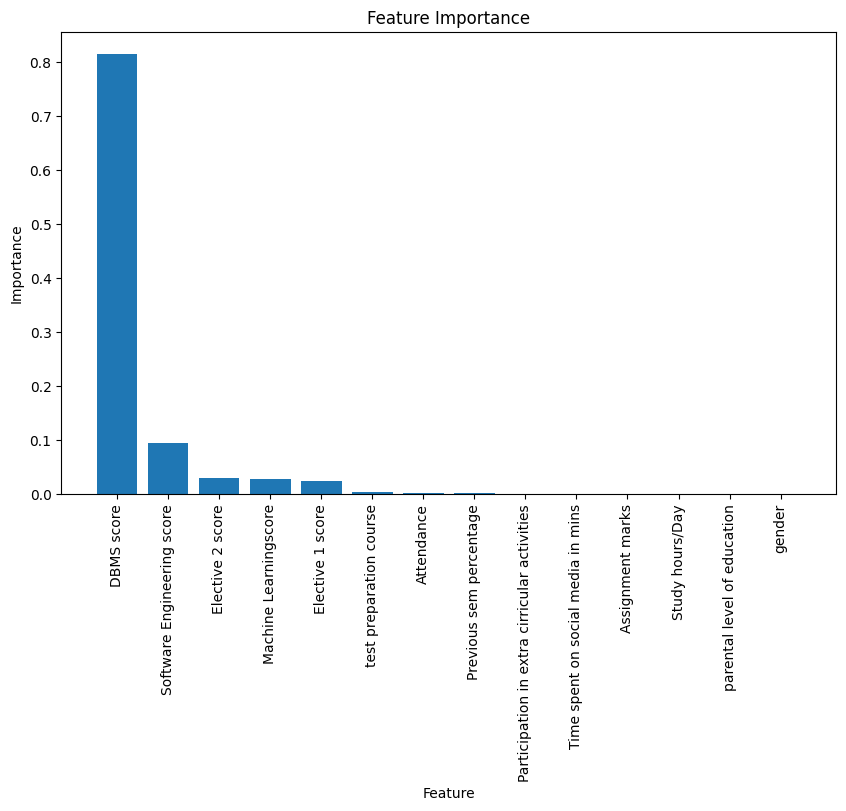

In [65]:
# Replace this with your actual feature names in the same order as your dataset
feature_names = X_train_new.columns

# Sort features by importance in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train_new.shape[1]), feature_importances[sorted_idx], align="center")
plt.xticks(range(X_train_new.shape[1]), [feature_names[i] for i in sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

In [66]:
from sklearn import tree
plt.figure(figsize=(250, 200))
tree.plot_tree(clf, feature_names=X_train_new.columns)

#Two  lines to make our compiler able to draw:
plt.savefig('a.jpg')

In [67]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_text
tree_text = export_text(clf, feature_names=X_train_new.columns.tolist(), spacing=3, decimals=2)
print(tree_text)


|--- DBMS score <= -0.84
|   |--- Software Engineering score <= -0.58
|   |   |--- Elective 1 score <= 0.39
|   |   |   |--- Elective 2 score <= 0.76
|   |   |   |   |--- Machine Learningscore <= -0.65
|   |   |   |   |   |--- Previous sem percentage <= 0.64
|   |   |   |   |   |   |--- Attendance <= -0.55
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Attendance >  -0.55
|   |   |   |   |   |   |   |--- DBMS score <= -0.96
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- DBMS score >  -0.96
|   |   |   |   |   |   |   |   |--- Elective 2 score <= -0.60
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- Elective 2 score >  -0.60
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Previous sem percentage >  0.64
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- Machine Learningscore >  -0.65
|   |   |   |   |   |--- class: 1
|   |   |   |--- Elective 2 score >  0.76


In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = y_test
# predicted values
predicted =y_pred1

# confusion matrix
matrixresult = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrixresult)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification DecisionTreeClassifier : \n',matrix)

Confusion matrix : 
 [[245   3]
 [  2   0]]
Outcome values : 
 245 3 2 0
Classification DecisionTreeClassifier : 
               precision    recall  f1-score   support

           1       0.99      0.99      0.99       248
           0       0.00      0.00      0.00         2

    accuracy                           0.98       250
   macro avg       0.50      0.49      0.49       250
weighted avg       0.98      0.98      0.98       250



In [69]:
import joblib
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("DecisionTreeClassifier  :",metrics.accuracy_score(y_test, y_pred4))

# Save the trained model to a file using joblib
# model_filename1 = "models/DecisionTree_Classifier_Classify_model.joblib"
# joblib.dump(classifier, model_filename1)
# print(f"Model saved as {model_filename1}")

DecisionTreeClassifier  : 0.968


In [70]:
model = SVC(kernel='linear')  # You can choose different kernel functions like 'linear', 'rbf', etc.

# Train the model on the training data
model.fit(X_train_new, y_train_new)

# Make predictions on the test data
y_pred2 = model.predict(X_test)

# svm

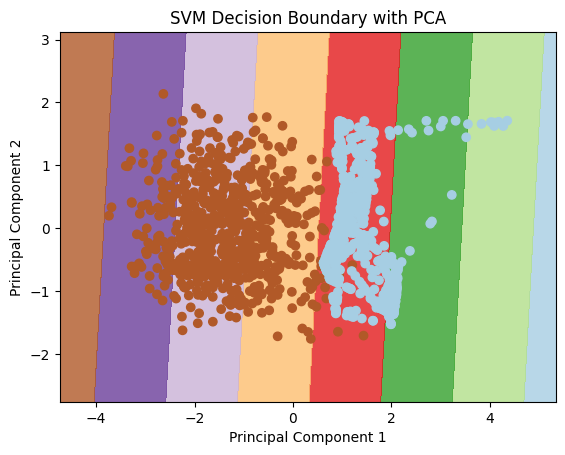

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Apply PCA to reduce the dimensionality to 2 for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train_new)
y=y_train_new
# Create an SVM classifier
clf = SVC(kernel='linear', C=1)
clf.fit(X_reduced, y)

# Create a mesh grid to visualize the decision boundary
h = .02
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and support vectors
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary with PCA')
plt.show()


In [72]:
X_train_new

gender  parental level of education  test preparation course  \
0          0                     0.250000                      0.0   
1          0                     0.000000                      0.0   
2          1                    -0.500000                      1.0   
3          0                     0.250000                      1.0   
4          0                    -0.250000                      0.0   
...      ...                          ...                      ...   
1449       0                     0.750000                      1.0   
1450       0                     0.181321                      1.0   
1451       0                     0.275516                      1.0   
1452       0                    -0.193274                      1.0   
1453       0                     0.750000                      1.0   

      Software Engineering score  Machine Learningscore  DBMS score  \
0                      -0.421053              -0.291667   -0.840000   
1                       0.368421               0.791667    0.640000   
2                      -0.052632               1.041667   -1.120000   
3                       0.421053              -1.041667   -0.600000   
4                       0.894737              -0.291667    0.000000   
...                          ...                    ...         ...   
1449                   -2.636311              -1.523981   -1.606043   
1450                   -1.694042              -0.878208   -1.170551   
1451                   -1.673467              -0.896263   -1.128165   
1452                   -1.907108              -1.081578   -0.880000   
1453                   -2.440145              -1.306781   -1.677582   

      Elective 1 score  Elective 2 score  Attendance  Study hours/Day  \
0            -0.634146         -0.047619   -1.833333         1.000000   
1             0.146341          0.285714   -0.388889        -0.500000   
2             1.512195         -0.666667   -1.055556        -0.500000   
3            -0.146341         -0.333333   -0.666667         0.000000   
4             0.292683         -1.000000   -0.500000        -0.500000   
...                ...               ...         ...              ...   
1449          0.044217         -0.083762    0.102718         0.000000   
1450         -0.346286         -0.726847   -0.086080        -0.500000   
1451         -0.057731         -0.650147    0.108849        -0.224484   
1452         -0.509942         -1.196881   -0.002793        -0.386549   
1453          0.384345          0.673980   -0.518608         0.000000   

      Assignment marks  Time spent on social media in mins  \
0            -0.200000                            0.250000   
1            -0.400000                            0.666667   
2             0.000000                           -0.333333   
3            -0.400000                           -0.333333   
4             0.000000                           -0.500000   
...                ...                                 ...   
1449          0.127339                            0.323140   
1450         -0.290114                            0.241761   
1451          0.000000                            0.275516   
1452          0.090761                           -0.132360   
1453          0.563725                           -0.282951   

      Participation in extra cirricular activities  Previous sem percentage  
0                                         1.000000                -2.142857  
1                                         0.000000                 0.000000  
2                                        -1.000000                 0.000000  
3                                         0.000000                 1.642857  
4                                         0.000000                 0.642857  
...                                            ...                      ...  
1449                                      1.000000                 0.075797  
1450                                      0.000000                

In [73]:
X_train_new.iloc[:, 5]

0      -0.840000
1       0.640000
2      -1.120000
3      -0.600000
4       0.000000
          ...   
1449   -1.606043
1450   -1.170551
1451   -1.128165
1452   -0.880000
1453   -1.677582
Name: DBMS score, Length: 1454, dtype: float64

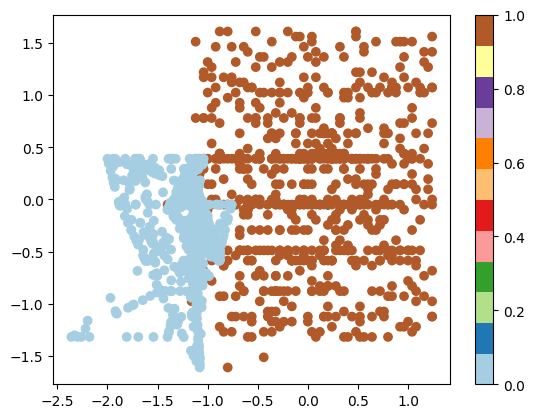

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from matplotlib.animation import FuncAnimation
# Train an SVM model
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X_train_new, y_train_new)

# Create a 2D scatter plot of the data points
def plot_data():
    plt.scatter(X_train_new.iloc[:, 5], X_train_new.iloc[:, 6], c=y_train_new, cmap=plt.cm.Paired)

# Create a function to plot the hyperplane
def plot_hyperplane(coef, intercept):
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))
    zz = (-coef[0] * xx - coef[1] * yy - intercept) / coef[2]
    plt.contour(xx, yy, zz, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

# Create an animation to move the hyperplane
fig, ax = plt.subplots()
ani = FuncAnimation(fig, lambda i: plot_hyperplane(clf.coef_[0], clf.intercept_[0] - i * 0.05),
                    frames=range(50), repeat=True)
plt.colorbar(plot_data(), ax=ax)

plt.show()

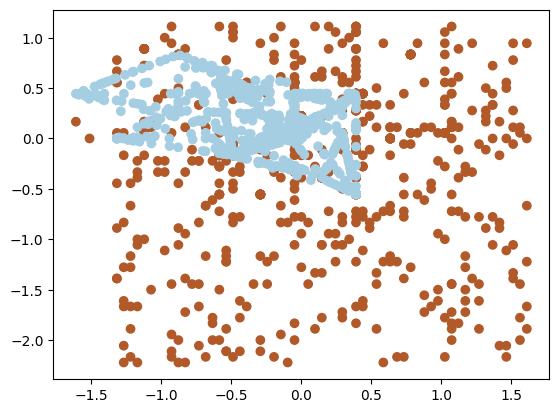

In [75]:
plt.scatter(X_train_new.iloc[:, 6], X_train_new.iloc[:, 8], c=y_train_new, cmap=plt.cm.Paired)

In [77]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = y_test
# predicted values
predicted =y_pred2

# confusion matrix
matrixresult = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrixresult)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification SVC : \n',matrix)

Confusion matrix : 
 [[246   2]
 [  0   2]]
Outcome values : 
 246 2 0 2
Classification SVC : 
               precision    recall  f1-score   support

           1       1.00      0.99      1.00       248
           0       0.50      1.00      0.67         2

    accuracy                           0.99       250
   macro avg       0.75      1.00      0.83       250
weighted avg       1.00      0.99      0.99       250



In [78]:
import joblib
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("SVC:",metrics.accuracy_score(y_test, y_pred4))

# Save the trained model to a file using joblib
# model_filename1 = "models/SVC_linear_Classify_model.joblib"
# joblib.dump(classifier, model_filename1)
# print(f"Model saved as {model_filename1}")

SVC: 0.968


In [79]:
model1 = SVC(kernel='rbf')  # You can choose different kernel functions like 'linear', 'rbf', etc.

# Train the model on the training data
model1.fit(X_train_new, y_train_new)

# Make predictions on the test data
y_pred10 = model1.predict(X_test)

In [80]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = y_test
# predicted values
predicted =y_pred10

# confusion matrix
matrixresult = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrixresult)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification SVC : \n',matrix)

Confusion matrix : 
 [[246   2]
 [  0   2]]
Outcome values : 
 246 2 0 2
Classification SVC : 
               precision    recall  f1-score   support

           1       1.00      0.99      1.00       248
           0       0.50      1.00      0.67         2

    accuracy                           0.99       250
   macro avg       0.75      1.00      0.83       250
weighted avg       1.00      0.99      0.99       250



In [81]:
import joblib
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("SVC rbf:",metrics.accuracy_score(y_test, y_pred4))

# Save the trained model to a file using joblib
# model_filename1 = "models/SVC_rbf_Classify_model.joblib"
# joblib.dump(classifier, model_filename1)
# print(f"Model saved as {model_filename1}")

SVC rbf: 0.968


# RandomForestClassifier

In [82]:
# Create an instance of the DecisionTreeClassifier
random = RandomForestClassifier()

# Fit the model to your training data
random.fit(X_train_new, y_train_new)

RandomForestClassifier()

In [83]:
# Make predictions on the test data
y_pred5 = model.predict(X_test)

In [84]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = y_test
# predicted values
predicted =y_pred5

# confusion matrix
matrixresult = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrixresult)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification SVC : \n',matrix)

Confusion matrix : 
 [[246   2]
 [  0   2]]
Outcome values : 
 246 2 0 2
Classification SVC : 
               precision    recall  f1-score   support

           1       1.00      0.99      1.00       248
           0       0.50      1.00      0.67         2

    accuracy                           0.99       250
   macro avg       0.75      1.00      0.83       250
weighted avg       1.00      0.99      0.99       250



In [85]:
import joblib
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy random_forest:",metrics.accuracy_score(y_test, y_pred5))

# Save the trained model to a file using joblib
# model_filename1 = "models/RandomForestClassifier_Classify_model.joblib"
# joblib.dump(random, model_filename1)
# print(f"Model saved as {model_filename1}")

Accuracy random_forest: 0.992


In [87]:
# You can also get feature importances
feature_importances = random.feature_importances_
print('Feature Importances:')
for feature, importance in zip(X_train_new.columns, feature_importances):
    print(f'{feature}: {importance}')

Feature Importances:
gender: 0.0022403618897558464
parental level of education: 0.017724173515193748
test preparation course: 0.022145329545241975
Software Engineering score: 0.22840816615927537
Machine Learningscore: 0.20609952460737843
DBMS score: 0.34851592723634833
Elective 1 score: 0.04116434091018696
Elective 2 score: 0.050661263261081016
Attendance: 0.026028128445276664
Study hours/Day: 0.005576889585840441
Assignment marks: 0.01626107436311666
Time spent on social media in mins: 0.0057863630051555644
Participation in extra cirricular activities: 0.0019091784325959021
Previous sem percentage: 0.027479279043553236


In [88]:
import pandas as pd
import numpy as np

def bootstrap_sample_df(df, n_samples):
    n_data = len(df)
    bootstrap_samples = []
    for _ in range(n_samples):
        sample_indices = np.random.randint(0, n_data, n_data)
        sample = df.iloc[sample_indices]
        bootstrap_samples.append(sample)
    return bootstrap_samples
n_bootstrap_samples = 5
bootstrap_samples = bootstrap_sample_df(X_train_new, n_bootstrap_samples)

for i, sample in enumerate(bootstrap_samples):
    print(f"Bootstrap Sample {i + 1}:\n{sample}")

Bootstrap Sample 1:
      gender  parental level of education  test preparation course  \
1418       1                     0.500000                 1.000000   
281        1                     0.500000                 1.000000   
1246       0                     0.750000                 0.623971   
1297       1                     0.500000                -1.000000   
287        0                    -0.500000                 0.000000   
...      ...                          ...                      ...   
1284       1                     0.750000                 1.000000   
1261       0                     0.750000                 1.000000   
1309       0                     0.744492                 1.000000   
1082       1                     0.523183                 1.000000   
1090       0                     0.750000                 1.000000   

      Software Engineering score  Machine Learningscore  DBMS score  \
1418                   -1.566454              -1.122896   -1.247475 

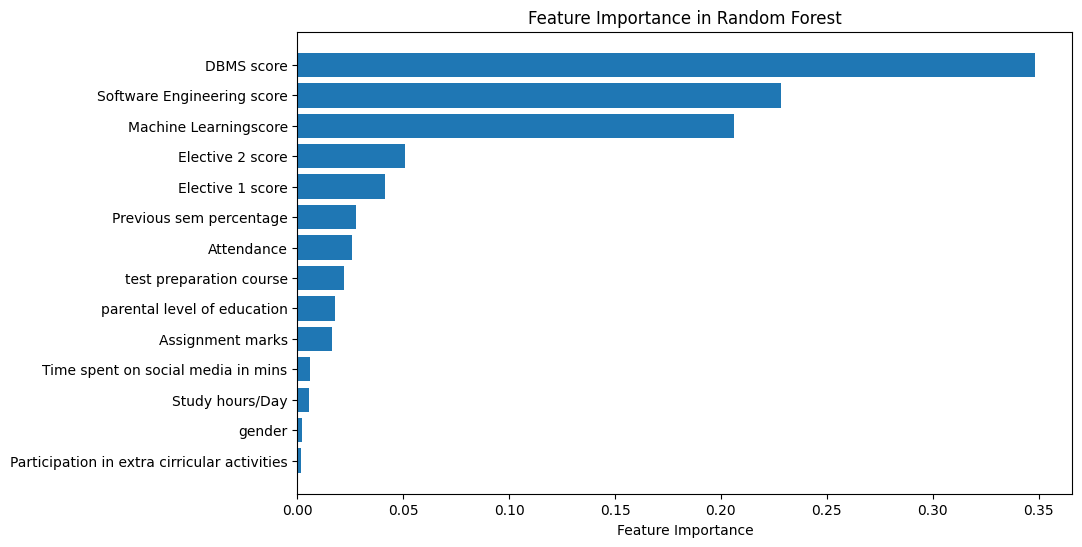

Selected Features: ['Software Engineering score', 'DBMS score']


In [89]:
# Get the names of the features
feature_names = X_train_new.columns

# Sort the features by importance
sorted_idx = np.argsort(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(feature_names)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest')
plt.show()

# Random feature selection for visualization (e.g., top 2 features)
selected_features = [feature_names[i] for i in sorted_idx[-2:]]

# Visualize the selected features
print("Selected Features:", selected_features)

In [90]:
from PIL import Image, ImageDraw, ImageFont

# Create a blank white image
width, height = 800, 600
image = Image.new("RGB", (width, height), "white")
draw = ImageDraw.Draw(image)

# Define the text and font
text = "Hello, World!"
font = ImageFont.truetype("arial.ttf", 30)
font1 = ImageFont.truetype("arial.ttf", 25)

# Define starting position
x, y = 10, 10

# Loop to draw text multiple times

print('Feature Importances:')
draw.text((x, y),'Feature Importances:', fill="black", font=font)
y += 40 
for feature, importance in zip(X_train_new.columns, feature_importances):
    print(f'{feature}: {importance}')
    draw.text((x, y), str(feature)+': '+str(importance), fill="black", font=font1)
    y += 30  # Move down for the next iteration

# Save the image
image.save("output.png")


Feature Importances:
gender: 0.0022403618897558464
parental level of education: 0.017724173515193748
test preparation course: 0.022145329545241975
Software Engineering score: 0.22840816615927537
Machine Learningscore: 0.20609952460737843
DBMS score: 0.34851592723634833
Elective 1 score: 0.04116434091018696
Elective 2 score: 0.050661263261081016
Attendance: 0.026028128445276664
Study hours/Day: 0.005576889585840441
Assignment marks: 0.01626107436311666
Time spent on social media in mins: 0.0057863630051555644
Participation in extra cirricular activities: 0.0019091784325959021
Previous sem percentage: 0.027479279043553236
